# A/B-тест (аналитик интернет-магазина)

**Задачи:**

* приоритизировать подготовленные гипотезы;

* запустить A/B-тест;

* проанализируйте результаты. 


# Часть 1. Приоритизация гипотез

* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Этапы:**

* приоритизация гипотез по ICE (по убыванию приоритета);
* приоритизация гипотез по RICE (по убыванию приоритета);
* отследить и объяснить изменения.

**Данные:**

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение, тем дороже проверка).

# Часть 2. Анализ A/B-теста

**Этапы:**

* график кумулятивной выручки;
* график кумулятивного среднего чека по группам;
* график относительного изменения кумулятивного среднего чека группы B к группе A;
* график кумулятивного среднего количества заказов на посетителя по группам;
* график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
* точечный график количества заказов по пользователям;
* 95-й и 99-й перцентили количества заказов на пользователя;
* точечный график стоимостей заказов;
* 95-й и 99-й перцентили стоимости заказов;
* статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
* статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным;
* статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
* статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным;
* принять решение по результатам теста.

**Данные:**

* Файл orders:

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.
_______________________________________________________________________________________________________________

* Файл visitors:

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез
# Загрузка и подготовка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# загрузка файла 
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
pd.set_option('display.max_colwidth', False)

Таблица состоит из 5 колонок и 9 строк, пропусков в данных нет. Формат данных не нарушен.

In [4]:
# посмотрим на данные

data.head(9)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# перевод в нижний регистр
data.columns = map(str.lower, data.columns) 

# Приоритизация по ICE 

In [6]:
# создаем новый столбец с расчетами для ICE
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'], 1)

print(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

Наиболее приоритетные гипотезы по ICE **8, 0, 7**. В пятерке также гипотезы **6, 2**.

# Приоритизация по RICE 

In [7]:
# создаем новый столбец с расчетами для RICE
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

Наиболее перспективные гипотезы по RICE **7, 2, 0, 6**. В пятерке также гипотеза **8**. 


# Вывод

Пятерка наиболее приоритетных гипотез осталась той же, однако на первом месте здесь гипотеза под номером 7. Так получилось, потому что данный фреймворк учитывает охват пользователей, в отличие от ICE, а параметр Reach гипотезы под номером 7 равен 10, в то время как у других гипотез он значительно меньше. 

Положение гипотез изменилось относительно этого параметра. 

Гипотеза 8 упала с 1 места на 5. 

Гипотезы 7, 0 сохранили свои позиции в тройке => их надо исследовать в первую очередь.

# Часть 2. Анализ A/B-теста


# Загрузка и подготовка данных


### Orders

In [8]:
orders = pd.read_csv('/datasets/orders.csv') #читаем файл
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Таблица состоит из 5 колонок и 1197 строк, пропусков в данных нет. Нарушен формат данных столбца date. Нарушен регистр.

In [10]:
# приводим столбец date к формату datetime
orders['date'] = pd.to_datetime(orders['date'])

# перевод в нижний регистр
orders.columns = map(str.lower, orders.columns) 

# переименуем столбцы
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']


In [11]:
# перепроверим пропуски 
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [12]:
# проверим на дубликаты
orders.duplicated().sum()

0

### Visitors

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv') #читаем файл
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Таблица состоит из 3 колонок и 62 строк, пропусков в данных нет. Нарушен формат данных столбца date. 

In [15]:
# приводим столбец date к формату datetime
visitors['date'] = pd.to_datetime(visitors['date'])


In [16]:
# перепроверим пропуски 
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
# проверим на дубликаты
visitors.duplicated().sum()

0

# A/B тест

## Кумулятивные метрики

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 


# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


Построим графики кумулятивной выручки по дням и группам A/B-тестирования



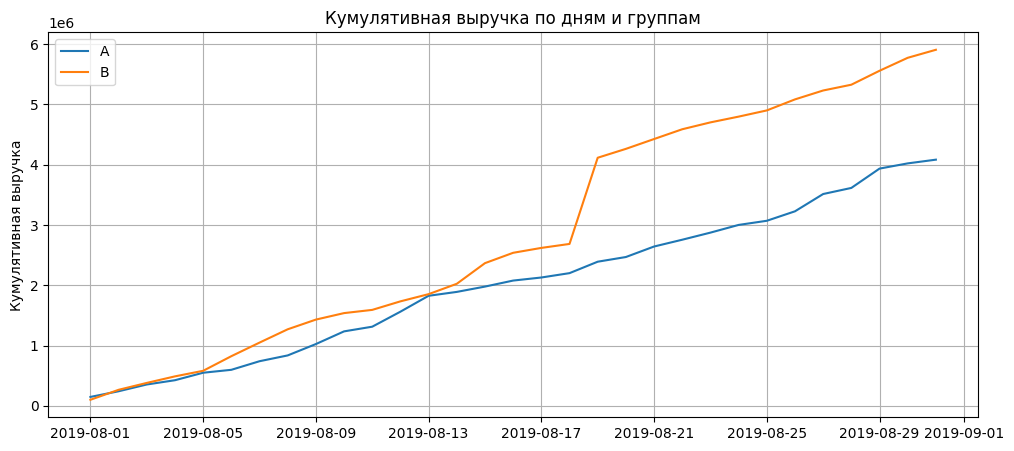

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,5)) # размер графика

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
plt.grid()

Выручка увеличивается на протяжении всего теста, у группы В рост происходит быстрее. 13 августа сегмент В вырвался вперед и продолжал лидировать весь остаток теста. 18 августа также наблюдается резкий скачок, который скорее всего связан с аномально большими заказами. При заключительном анализе их нужно будет удалить.

Построим графики среднего чека по дням


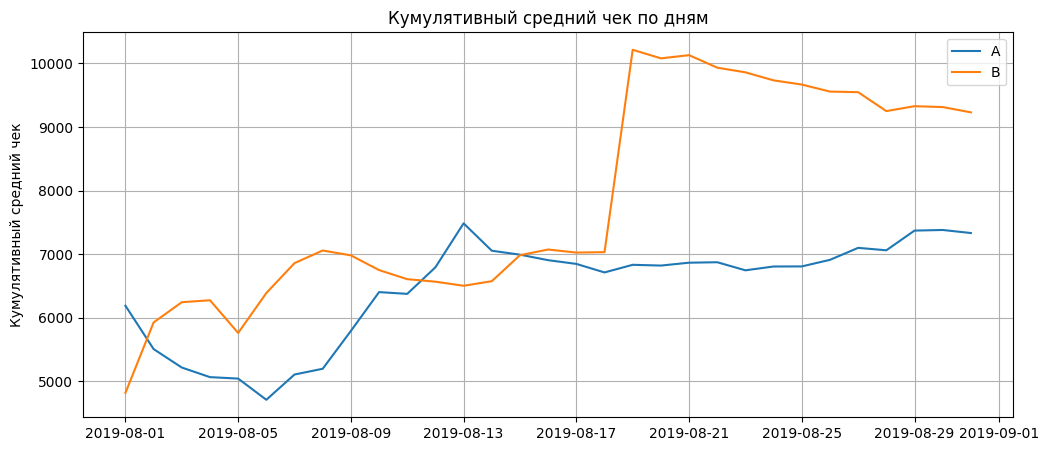

In [20]:
plt.figure(figsize=(12,5)) # размер графика

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по дням')
plt.ylabel('Кумулятивный средний чек')
plt.legend() 
plt.grid()

Кумулятивный средний чек растет неравномерно. 

У группы А наблюдается резкое падение практически в начале теста, затем чек растет, достигает пикового значения 13 августа и становится практически равномерныи. На протяжении более половины теста средний чек не увеличивался. 

Группа В на протяжении половины теста имеет резкие взлеты и падения, но в тот же период, что на предыдущем графике происходит резкий всплеск. Скорее всего, это связано с крупным заказом. Затем средний чек снова начал падать, но стал равномернее. 


Построим график относительно различия кумулятивного среднего чека группы B к группе A


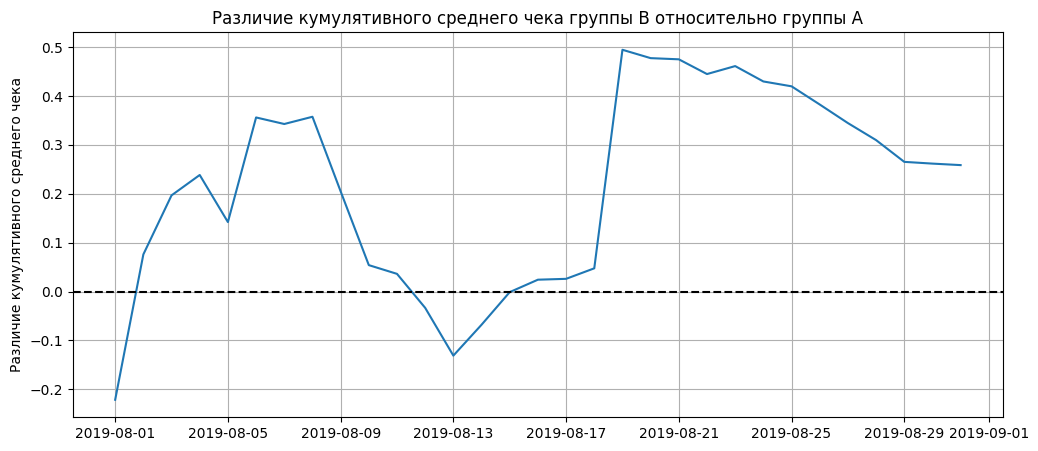

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5)) # размер графика

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Различие кумулятивного среднего чека группы В относительно группы А')
plt.ylabel('Различие кумулятивного среднего чека')
plt.grid()

Результаты теста значительно и резко менялись в некоторые дни. Скорее всего, именно тогда были сделаны аномально большие заказы. 

Построим графики кумулятивного среднего количества заказов на посетителя по группам и по дням

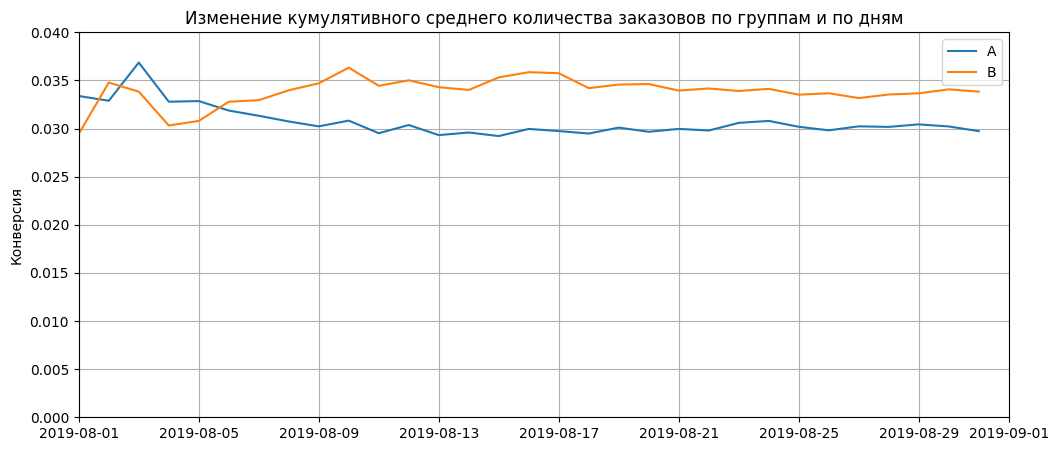

In [22]:
# считаем среднее количество заказов на посетителя, создадим столбец conversion 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,5)) # размер графика

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04])
plt.ylabel('Конверсия')
plt.title("Изменение кумулятивного среднего количества заказовов по группам и по дням") 
plt.grid()

В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
Видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 4%.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

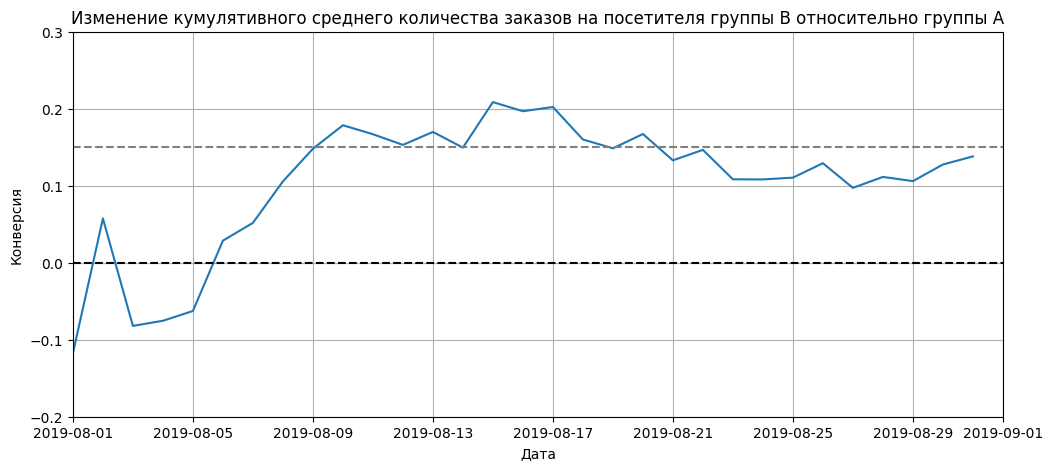

In [23]:
# оюъединяем таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', 
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(12,5)) # размер графика

# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01', format = '%Y-%m-%d'),
             pd.to_datetime('2019-09-01', format = '%Y-%m-%d'), -0.2, 0.3])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Изменение кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.grid()
plt.show()

Почти с самого начала теста группа B лидирует по метрике: становится лучше и лучше, фиксируется примерно в 15% относительно группы A.

## Анализ выбросов и всплесков

Построим точечный график количества заказов по пользователям

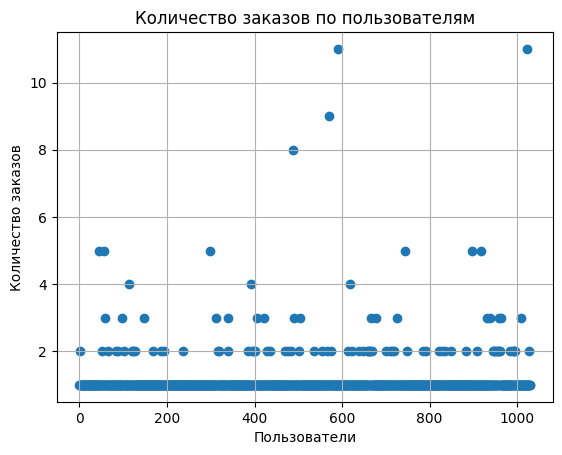

In [24]:
# создаем датафрейм с количеством заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.grid()
plt.show()


Пользователей, заказавших более двух раз, совсем мало. Для того, чтобы узнать аномалия это или нет, посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [25]:
print(np.percentile(ordersByUsers['transaction_id'], [ 95, 99]))


[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов.

Построим точечный график стоимостей заказов

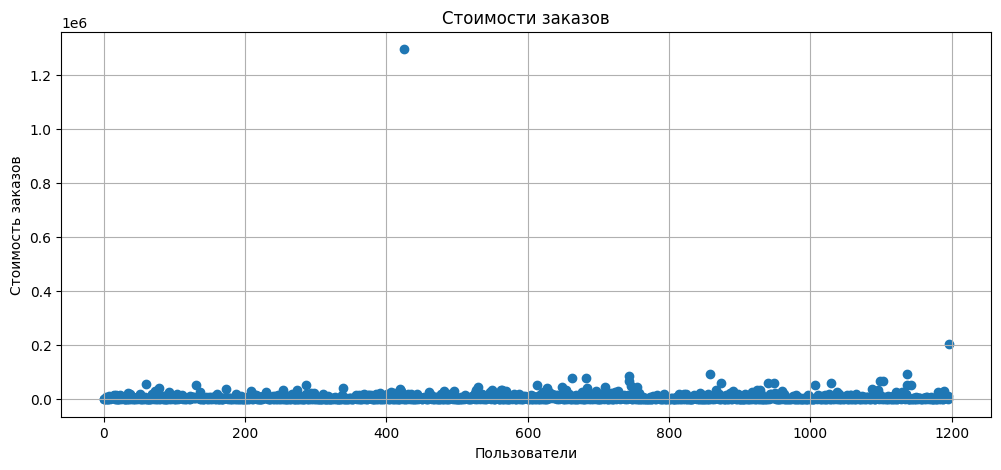

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12,5)) # размер графика

plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.grid()
plt.show()

Есть 2 выброса в районе 1 250 000 и 200 000. Для того, чтобы узнать аномалия это или нет, посчитаем 95-й и 99-й перцентили.

In [27]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

За Н0 примем то, что статистически значимых различий в среднем количестве заказов нет. За Н1 примем то, что среднее количество заказов в каждой группе различно. 


In [28]:
# подготовим таблицу 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [29]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [30]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transaction_id'], 
#где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 


In [31]:
# создадим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
sampleA = pd.concat([ordersByUsersA['transaction_id'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), 
                               name='orders')],axis=0)

In [32]:
# посчитаем статистическую значимость различия среднего количества заказов по результатам теста, применив тест Манна-Уитни
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. 

Относительный прирост среднего группы В к конверсии группы А равен 13.8%.



Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

За Н0 примем то, что статистически значимых различий в среднем чеке заказа нет. За Н1 примем то, что средний чек заказа у двух групп значительно различается. 


In [33]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                     orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                 orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%.



Очистим данные и посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами 


Подготовим данные. 

Учитываем, что:
* 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. 
* 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. 

Примем за аномальных пользователей тех, кто совершил 4 заказа и более или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. 
Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [34]:
# делаем срез пользователей

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Выясним, есть ли существенные различия между группами с очищенными данными.

In [35]:
# создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


P-value: 0.018
Относительные различия: 0.145


Как и в случае с сырыми данными, статистическая значимость достигнута. Группа B значительно лучше группы A.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей



In [36]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value: 0.961
Относительные различия: -0.014


P-value 0.96 говорит о наличии статистической значимости различия среднего чека заказов между группами. После удаления выбросов в данных стало меньше шума. Разница между сегментами изменилась с 26% до -14%.



# Вывод

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Прирост группы В выше прироста группы А на 14%.

Сырые данные показывают, что кумулятивный средний чек растет неравномерно. На протяжении более половины теста средний чек группы А не увеличивался. Группа В на протяжении половины теста имеет резкие взлеты и падения, что позволило нам обнаружить аномалии. Фильтрация данных показала нам наличие статистической значимости различия средних чеков. 

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, прирост около 15%.

График различия среднего чека колеблется, что также свидетельтсвует об аномалиях. 

Тест можно остановить и признать его успешным.

